## Network Science Project 1
### Autumn 2022
### Due: November 4th, 1:00pm GMT

Please provide the following information:

Group number: 59

CID #1: 02025140

CID #2:

CID #3: 02047469

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Overview

When working on real-world problems, we often encounter *weighted* networks. In this assignment, you will work through a set of tasks using data for a weighted directed network where the nodes correspond to regions of the human brain with particular functions, and weighted links indicate the density of neuron fiber pathways between regions. You have been provided a file containing the network data which should be stored in the same folder as this notebook. Run the cell below to verify that you can load the graph.

In [2]:
import networkx as nx
g = nx.read_graphml('project1.graphml')
g = nx.convert_node_labels_to_integers(g)
print(type(g))
print("N=",g.number_of_nodes())
print("L=",g.number_of_edges())

<class 'networkx.classes.digraph.DiGraph'>
N= 872
L= 4036


The output from the cell above should indicate that g is a DiGraph with 872 nodes and 4036 links. 

Note that the label assigned to the edge weights in g is 'eweight'.

### Part 1: degree distributions (7 points)

For directed graphs, a node has two types of degrees, an in-degree ($k^{in}$) and an out-degree ($k^{out}$). For weighted graphs we have weighted versions of these degrees which can be computed as follows. Let $\rm W$ be the *weight matrix* for a directed network where $W_{ij}$ is the weight for the link pointing from node $j$ to node $i$. If no such link exists, then $W_{ij}=0$. The weighted in- and out-degrees for node $i$ can be computed using: 
$$\tilde k_i^{in} = \sum_{j=1}^N W_{ij}, $$
$$\tilde k_i^{out} = \sum_{j=1}^N W_{ji}. $$


1. Add code to the cell below to create a well-designed figure which shows the unweighted in- and out-degree distributions for the provided graph. Both distributions should be displayed on the same plot. Below the figure, provide a 1-paragraph explanation which: 1) describes one or more important differences between the two distributions and 2) explains what the difference(s) tells you about the graph structure. You should not focus on individual degree values but instead explain trends associated with a range (or ranges) of degrees. You should use your judgement to decide what is "important".

Note: *nx.degree_histogram* is unlikely to be helpful here, however the *np.unique* function with the *return_counts* option may be useful.

C:\Users\liyiy\AppData\Local\Temp\ipykernel_29592\1453692210.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).T


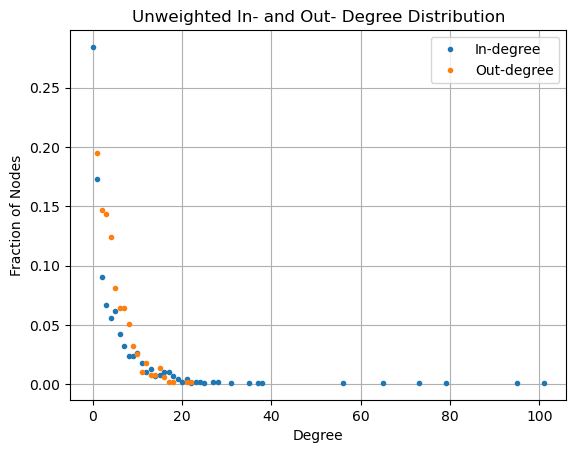

In [3]:
# obtain the adjacency matrix
A = nx.adjacency_matrix(g).T
N = g.number_of_nodes()

# k_i_in = sum of ith row
# k_i_out = sum of ith col
k_i_in = [np.sum(A[i,:]) for i in range(N)]
k_i_out = [np.sum(A[:,i]) for i in range(N)]
# np.unique returns degree k list, the number of degree k nodes
in_deg, in_deg_count = np.unique(k_i_in, return_counts=True)
out_deg, out_deg_count = np.unique(k_i_out, return_counts=True)


# plot
plt.figure(2)
plt.plot(in_deg, in_deg_count/N, '.', label='In-degree')
plt.plot(out_deg, out_deg_count/N, '.', label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Unweighted In- and Out- Degree Distribution')
plt.legend()
plt.grid()

*Add explanation here*


2. Now develop code to create a well-designed figure which shows the **weighted** in- and out-degree distributions. Carefully examine the figure and revisit your discussion from the previous question. Explain if/to what degree your conclusions for the unweighted degree distributions apply to the weighted distributions.

C:\Users\liyiy\AppData\Local\Temp\ipykernel_29592\97575961.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(g, weight='eweight').T


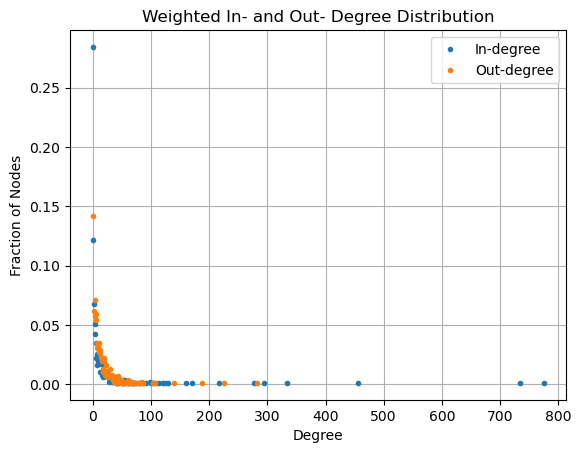

In [4]:
# obtain the weight matrix
W = nx.adjacency_matrix(g, weight='eweight').T

# k_tilde_i_in = sum of ith row
# k_tilde_i_out = sum of ith col
k_tilde_i_in = [np.sum(W[i,:]) for i in range(N)]
k_tilde_i_out = [np.sum(W[:,i]) for i in range(N)]
# np.unique returns degree k list, the number of degree k nodes
weighted_in_deg, weighted_in_deg_count = np.unique(k_tilde_i_in, return_counts=True)
weighted_out_deg, weighted_out_deg_count = np.unique(k_tilde_i_out, return_counts=True)


# plot
plt.figure(2)
plt.plot(weighted_in_deg, weighted_in_deg_count/N, '.', label='In-degree')
plt.plot(weighted_out_deg, weighted_out_deg_count/N, '.', label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Weighted In- and Out- Degree Distribution')
plt.legend()
plt.grid()

*Add explanation here*



### Part 2: centrality (9 points)

You will now develop your own code to compute the PageRank centrality. Recall that the PageRank centrality of node $i$ is typically given by: $$x_i = \sum_{j=1}^N\left[\left(1-m\right)\frac{A_{ij}}{max(k_j^{out},1)}x_j + \frac{m}{N}x_j\right],$$ where $\rm A$ is the adjacency matrix for a graph, $N$ is the number of nodes, and we will use $m=0.15$ throughout this assigment. 

1. Complete the function below to *efficiently* compute the PageRank centrality for the provided graph using the power method. Code for the initial guess for the centrality vector, $\textrm{y}^{(0)}$ has been provided. Let $\textrm{y}^{(i)}$ be the vector produced by the $i^{th}$ iteration of the power method with $i>0$. This vector should be normalized so that its maximum value is 1. There is no need to use any other normalization (e.g. based on the vector's magnitude). Let $d_j^{(i)}=|y_j^{(i)}-y_j^{(i-1)}|, j \in \left\{1,2,...,N\right\}$. The power method iterations should terminate when $max\left\{ d_1^{(i)}, d_2^{(i)}, ..., d_N^{(i)}\right\}<tol$ where *tol* is an input variable for the function.

You should think carefully about how to avoid unnecessary calculations and unnecessary loops. You may use numpy and scipy as needed. If using scipy, add the appropriate import statements to the cell below within the function. **Do not use or import any other modules for this question**. Your code should not use any variables created outside of the function other than those provided as input (A and tol). Below the function, provide a 2-3 sentence explanation of the main steps you have taken to make your code efficient.

In [5]:
def pageRank(A,tol=1e-8):
    """
    Compute PageRank centrality for N-node graph with adjacency matrix A

    Input:
    A: The adjacency matrix of the graph generated in the cell below
    tol: tolerance used to terminate iterations of power method
    
    Output:
    y: N-element numpy array containing the centrality vector

    Please do not modify the function input or the return statement below
    """
    import scipy.sparse as sp
    m = 0.15
    N = A.shape[0] #number of nodes
    y0 = np.random.rand(N) #initial trial vector

    # k_j_out = sum of jth col 
    k_list = np.array([max(np.sum(A[:,j]), 1) for j in range(N)])

    # calculate G
    # G_ij = A[i][j] * (1 - m) / max(np.sum(A[j]), 1) + m / N
    G = np.zeros((N, N))
    for i in range(N):
        G[i,:] = A[i,:] * (1 - m) / k_list + m / N
    # convert G to sparse matrix
    G = sp.csr_matrix(G)

    # initialize
    y = sp.csr_matrix.dot(G, y0)
    y = y / max(y)
    d = max(y - y0)
    y0 = y
    # compute y by power method y <- G.y
    # while loop terminates when d < tol
    while d >= tol:
        # update y
        y = sp.csr_matrix.dot(G, y0)
        # normalize y
        y = y / max(y)

        # update d(y, y0)
        d = max(y - y0)
        # update y0
        y0 = y            

    return y


In [6]:
#Code for calling pageRank function
A = nx.adjacency_matrix(g).T
x = pageRank(A,tol=1e-12)

C:\Users\liyiy\AppData\Local\Temp\ipykernel_29592\2634158979.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).T


- To avoid double nested for-loops (time complexity $O(n^2)$), ${\bf G}$ is calculated in a single loop using NumPy Arrays <br> where ${\bf G}_{ij} = \frac{{\bf A}_{ij}(1-m)}{max(k_j^{out},1)} + \frac{m}{N}$
  
- The value of $max(k_j^{out},1)$ for $j = 1, ..., N$ is stored in a np array (k_list) to avoid repeated calculations

- In the power method iteration, ${\bf G}$ is converted to SciPy Sparse Matrix to accelerate calculations <br> (use sp.csr_matrix.dot for scipy sparse matrix and numpy array multiplication)

- To avoid cumulative error, normalize after each iteration

  (Runtime 0.3s)

2. PageRank can be naturally modified for weighted graphs to:
$$\tilde{x}_i = \sum_{j=1}^N\left[\left(1-m\right)\frac{W_{ij}}{max(\tilde{k}_j^{out},1)}\tilde{x}_j + \frac{m}{N}\tilde{x}_j\right],$$

Complete the function below to efficiently compute this modified PageRank centrality for the nodes in the provided graph using the power method. The same guidance and restrictions from the previous question apply here as well. It is completely fine to reuse code from your pageRank function above as needed. 

In [7]:
def pageRankW(W,tol=1e-8):
    """
    Compute Weighted PageRank centrality for N-node graph with weight matrix W

    Input:
    W: The weight matrix of the graph generated in the cell below
    tol: tolerance used to terminate iterations of power method
    
    Output:
    y: N-element numpy array containing the centrality vector
    
    Please do not modify the function input or the return statement below
    """
    import scipy.sparse as sp
    m=0.15
    N = W.shape[0] #number of nodes
    y0 = np.random.rand(N) #initial trial vector

    # k_j_out = sum of jth col 
    k_list = np.array([max(np.sum(W[:,j]), 1) for j in range(N)])
    
    # calculate G
    # G_ij = W[i][j] * (1 - m) / max(np.sum(W[j]), 1) + m / N
    G = np.zeros((N, N))
    for i in range(N):
        G[i,:] = W[i,:] * (1 - m) / k_list + m / N
    # convert G to sparse matrix
    G = sp.csr_matrix(G)

    # initialize
    y = sp.csr_matrix.dot(G, y0)
    y = y / max(y)
    d = max(y - y0)
    y0 = y
    # compute y by power method y <- G.y
    # while loop terminates when d < tol
    while d > tol:
        # update y
        y = sp.csr_matrix.dot(G, y0)
        # normalize y
        y = y / max(y)

        # update d(y , y0)
        d = max(y - y0)
        # update y0
        y0 = y  
        
    return y


In [8]:
#Code for calling pageRank function
W = nx.adjacency_matrix(g,weight='eweight').T
x_tilde = pageRankW(W,tol=1e-12)

C:\Users\liyiy\AppData\Local\Temp\ipykernel_29592\3152834066.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(g,weight='eweight').T


*No discussion of pageRankW function is needed*

3. Examine your results for the centralities, and compare the ten most important nodes as ranked by (1) the unweighted in-degree centrality, (2) the unweighted PageRank centrality, and (3) the weighted PageRank centrality. Add code to the cell below to support your comparison. Provide a brief non-technical description of how much agreement there is between (1) and (2) and between (2) and (3). Your code may generate 1-2 figures, simply print out lists of the most important nodes, or do something else that is comparably useful.

In [9]:
# calculate PageRank using nx.pagerank
x_nx = np.array(list(nx.pagerank(g).values()))
x_tilde_nx = np.array(list(nx.pagerank(g, weight='eweight').values()))
# rescale
x_nx = x_nx / max(x_nx)
x_tilde_nx = x_tilde_nx / max(x_tilde_nx)

# calculate error
err1 = np.linalg.norm(x - x_nx)
err2 = np.linalg.norm(x_tilde - x_tilde_nx)

print('Error for x: {:>17.9f}'.format(err1))
print('Error for x_tilde: {:.9f}'.format(err2))

Error for x:       0.003072877
Error for x_tilde: 0.003162440


Ten most important nodes by
 unweighted in-degree centrality: [866 431 430 865 869 434 143 569 864 429]
 unweighted PageRank centrality:  [870 871 869 866 862 864 434 867 865 431]
 weighted PageRank centrality:    [870 871 869 866 862 434 864 431 432 865]


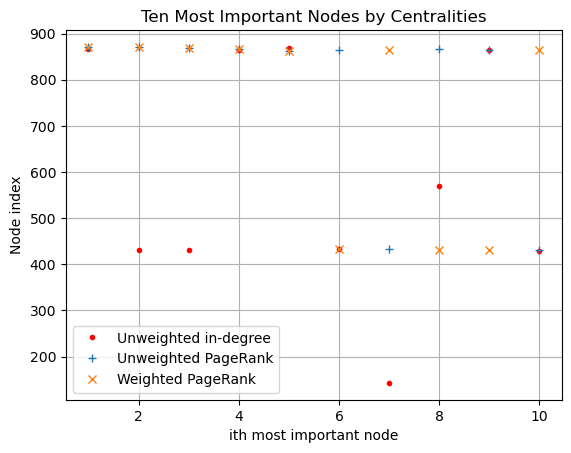

In [10]:
# obtain indices of the 10 most important nodes
idx1 = np.argsort(k_i_in)[-10:][::-1] #unweighted in-degree
idx2 = np.argsort(x)[-10:][::-1] #unweighted PageRank
idx3 = np.argsort(x_tilde)[-10:][::-1] #weighted PageRank


# plot
xs = [i for i in range(1, 11)]
plt.figure(3)
plt.plot(xs, idx1, '.', color='red', label='Unweighted in-degree')
plt.plot(xs, idx2, '+', label='Unweighted PageRank')
plt.plot(xs, idx3, 'x', label='Weighted PageRank')
plt.xlabel('ith most important node')
plt.ylabel('Node index')
plt.title('Ten Most Important Nodes by Centralities')
plt.legend()
plt.grid()


print('Ten most important nodes by')
print(' unweighted in-degree centrality:', idx1)
print(' unweighted PageRank centrality: ', idx2)
print(' weighted PageRank centrality:   ', idx3)

### Part 3: Visualizing a random person's brain network (4 points)

Create a well-designed figure displaying the 100 most important nodes in the brain network and the links connecting these nodes with each other. You may use the centrality of your choice to decide which nodes are the most important. The node sizes in your figure should be set so that larger sizes correspond to more important nodes. You do not need to include node labels, edge weights, or use the edge weights to modify the displayed links.


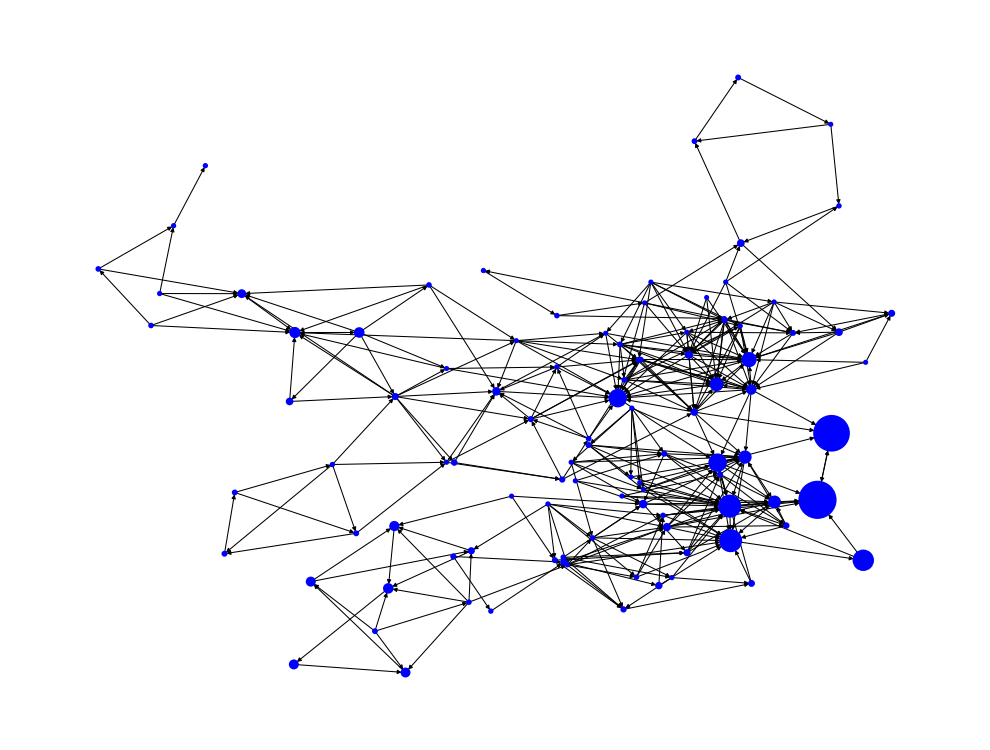

In [28]:
# obtain indices of the 100 most important nodes 
# by weighted PageRank centrality
idx100 = np.argsort(x_tilde)[-100:][::-1]
# obtain the 100 most important nodes subgraph
g100 = g.subgraph(idx100)

# set node size
node_size = x_tilde[idx100] * 300
# set layout
pos = nx.kamada_kawai_layout(g100)
# plot
plt.figure(dpi=150)
nx.draw(g100, pos=pos, nodelist=idx100.tolist(), node_size=node_size.tolist(), node_color='b', width=0.5, arrowsize=4)


**Note:** If you are curious about the neuroscience aspect of this assignment, you can extract information about each graph node as in the cell below. However, note that the original graph has been "adjusted" a little to make it suitable for this assignment. This is just "extra" information and is not needed to complete the assignment.

In [13]:
print(g.nodes[0])

{'dn_correspondence_id': '1', 'dn_hemisphere': 'right', 'dn_name': 'rh.lateralorbitofrontal_9', 'dn_fsname': 'lateralorbitofrontal_9', 'dn_region': 'cortical', 'dn_position_z': 29.7843137255, 'dn_position_y': 72.6764705882, 'dn_position_x': 37.637254902, 'id': '1'}


### Further guidance

* Your group should submit both a completed Jupyter notebook and *either* a pdf version or html version of the notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Each group should make a single submission.
    To submit your assignment, go to the Project 1 item on the module Blackboard page. There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project1_groupx.ipynb* and *project1_groupx.pdf* or *project1_groupx.html* where x is your group number). 
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** for part 2, questions 1 and 2. Please do not use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your codes for part 2, questions 1 and 2, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. 
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
